# Trabalho Análise Exploratória de Dados

### Carregando Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json
import matplotlib.dates as mdates

#### Definindo Paleta de Cores

In [2]:
# Cores
with open("Cores.json") as f:
    cores = json.load(f)

#removida a cor branca do json
paleta = sns.color_palette(list(cores.values()))

# Setar globalmente
sns.set_palette(paleta)

### Carregando Dataset USA Bank Financial Data e avaliando suas caracterísiticas Iniciais

In [3]:
df = pd.read_csv('DATA_New/myusabank.csv')

In [4]:
df.columns

Index(['Date', 'Interest_Income', 'Interest_Expense', 'Average_Earning_Assets',
       'Net_Income', 'Total_Assets', 'Shareholder_Equity',
       'Operating_Expenses', 'Operating_Income', 'Market_Share',
       'Stock_Price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    523 non-null    object 
 1   Interest_Income         471 non-null    float64
 2   Interest_Expense        523 non-null    int64  
 3   Average_Earning_Assets  523 non-null    int64  
 4   Net_Income              471 non-null    float64
 5   Total_Assets            523 non-null    int64  
 6   Shareholder_Equity      523 non-null    int64  
 7   Operating_Expenses      523 non-null    int64  
 8   Operating_Income        523 non-null    int64  
 9   Market_Share            523 non-null    int64  
 10  Stock_Price             523 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 45.1+ KB


In [6]:
df.describe().round(2)

,Interest_Income,Interest_Expense,Average_Earning_Assets,Net_Income,Total_Assets,Shareholder_Equity,Operating_Expenses,Operating_Income,Market_Share,Stock_Price
count,471.00,523.00,523.00,471.00,523.00,523.00,523.00,523.00,523.00,523.00
mean,2493118.29,801774.89,55141960.59,1588192.28,89818895.48,24806885.91,1095483.64,4003111.66,19.50,125.89
std,292756.32,351911.77,2921746.58,480802.90,5615666.39,2867721.47,227710.55,579437.41,5.73,41.94
min,2002869.00,501015.00,50064323.00,1007906.00,80100734.00,20019675.00,706530.00,3000159.00,10.00,50.00
25%,2236190.00,614208.50,52606028.00,1261573.50,84755722.50,22286423.00,895324.50,3528300.00,14.00,92.50
50%,2477095.00,726156.00,55238331.00,1558030.00,89734816.00,24464344.00,1107592.00,3979947.00,20.00,123.00
75%,2743213.00,872570.50,57715991.00,1793555.50,94674812.00,27279528.00,1284193.50,4523654.00,25.00,162.00
max,2999890.00,2967591.00,59993726.00,3999402.00,99951324.00,29992154.00,1497622.00,4999284.00,29.00,199.00


#### Convertendo o formato data

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
#df['Date'] = df['Date'].dt.strftime('%d/%m/%y')
df = df.sort_values('Date')
df = df.set_index('Date')

In [8]:
df.head()

,Interest_Income,Interest_Expense,Average_Earning_Assets,Net_Income,Total_Assets,Shareholder_Equity,Operating_Expenses,Operating_Income,Market_Share,Stock_Price
Date,,,,,,,,,,
2022-01-03,2121958.0,773237,55001045,1572212.0,95404302,23496605,811672,3494178,24,128
2022-01-03,2121958.0,773237,55001045,1572212.0,95404302,23496605,811672,3494178,24,128
2022-01-04,2671155.0,518070,54463418,1336326.0,86440010,24948600,1030817,3231496,20,63
2022-01-05,2131932.0,797921,59771802,1224137.0,88674163,26416438,1345961,3692148,22,196
2022-01-06,2365838.0,556958,54345760,1452268.0,97221407,29694095,1289921,4779685,14,177


In [9]:
df.tail()

,Interest_Income,Interest_Expense,Average_Earning_Assets,Net_Income,Total_Assets,Shareholder_Equity,Operating_Expenses,Operating_Income,Market_Share,Stock_Price
Date,,,,,,,,,,
2023-12-22,2445101.0,612816,56790968,1909827.0,94722892,27353172,1324411,4664986,13,195
2023-12-26,2036631.0,628778,53751198,1669648.0,89223644,21437188,1496948,3044760,10,104
2023-12-27,2766577.0,562292,57369434,1613474.0,90758430,21656321,1172501,4047159,22,169
2023-12-28,2072991.0,785977,53138145,1924044.0,99661007,20538645,848586,3285622,29,124
2023-12-29,2004014.0,1905690,51226476,3768400.0,93863529,29960559,1083395,4962889,16,70


In [10]:
# Verificar se há datas duplicadas no índice
duplicatas = df.index.duplicated()
print(f"Número de datas duplicadas: {duplicatas.sum()}")

if duplicatas.any():
    print("\nDatas duplicadas encontradas:")
    print(df.index[duplicatas])
    
    # Remover duplicatas (manter a primeira ocorrência)
    df = df[~duplicatas]
    print("\nDuplicatas removidas. DataFrame atualizado.")
else:
    print("Nenhuma data duplicada encontrada.")

Número de datas duplicadas: 24

Datas duplicadas encontradas:
DatetimeIndex(['2022-01-03', '2022-02-22', '2022-03-17', '2022-03-18',
               '2022-05-04', '2022-06-28', '2022-08-23', '2022-10-05',
               '2022-10-17', '2022-11-14', '2022-11-28', '2023-01-18',
               '2023-02-07', '2023-03-03', '2023-03-13', '2023-03-23',
               '2023-05-10', '2023-09-13', '2023-09-15', '2023-10-20',
               '2023-11-01', '2023-11-09', '2023-11-20', '2023-12-06'],
              dtype='datetime64[ns]', name='Date', freq=None)

Duplicatas removidas. DataFrame atualizado.


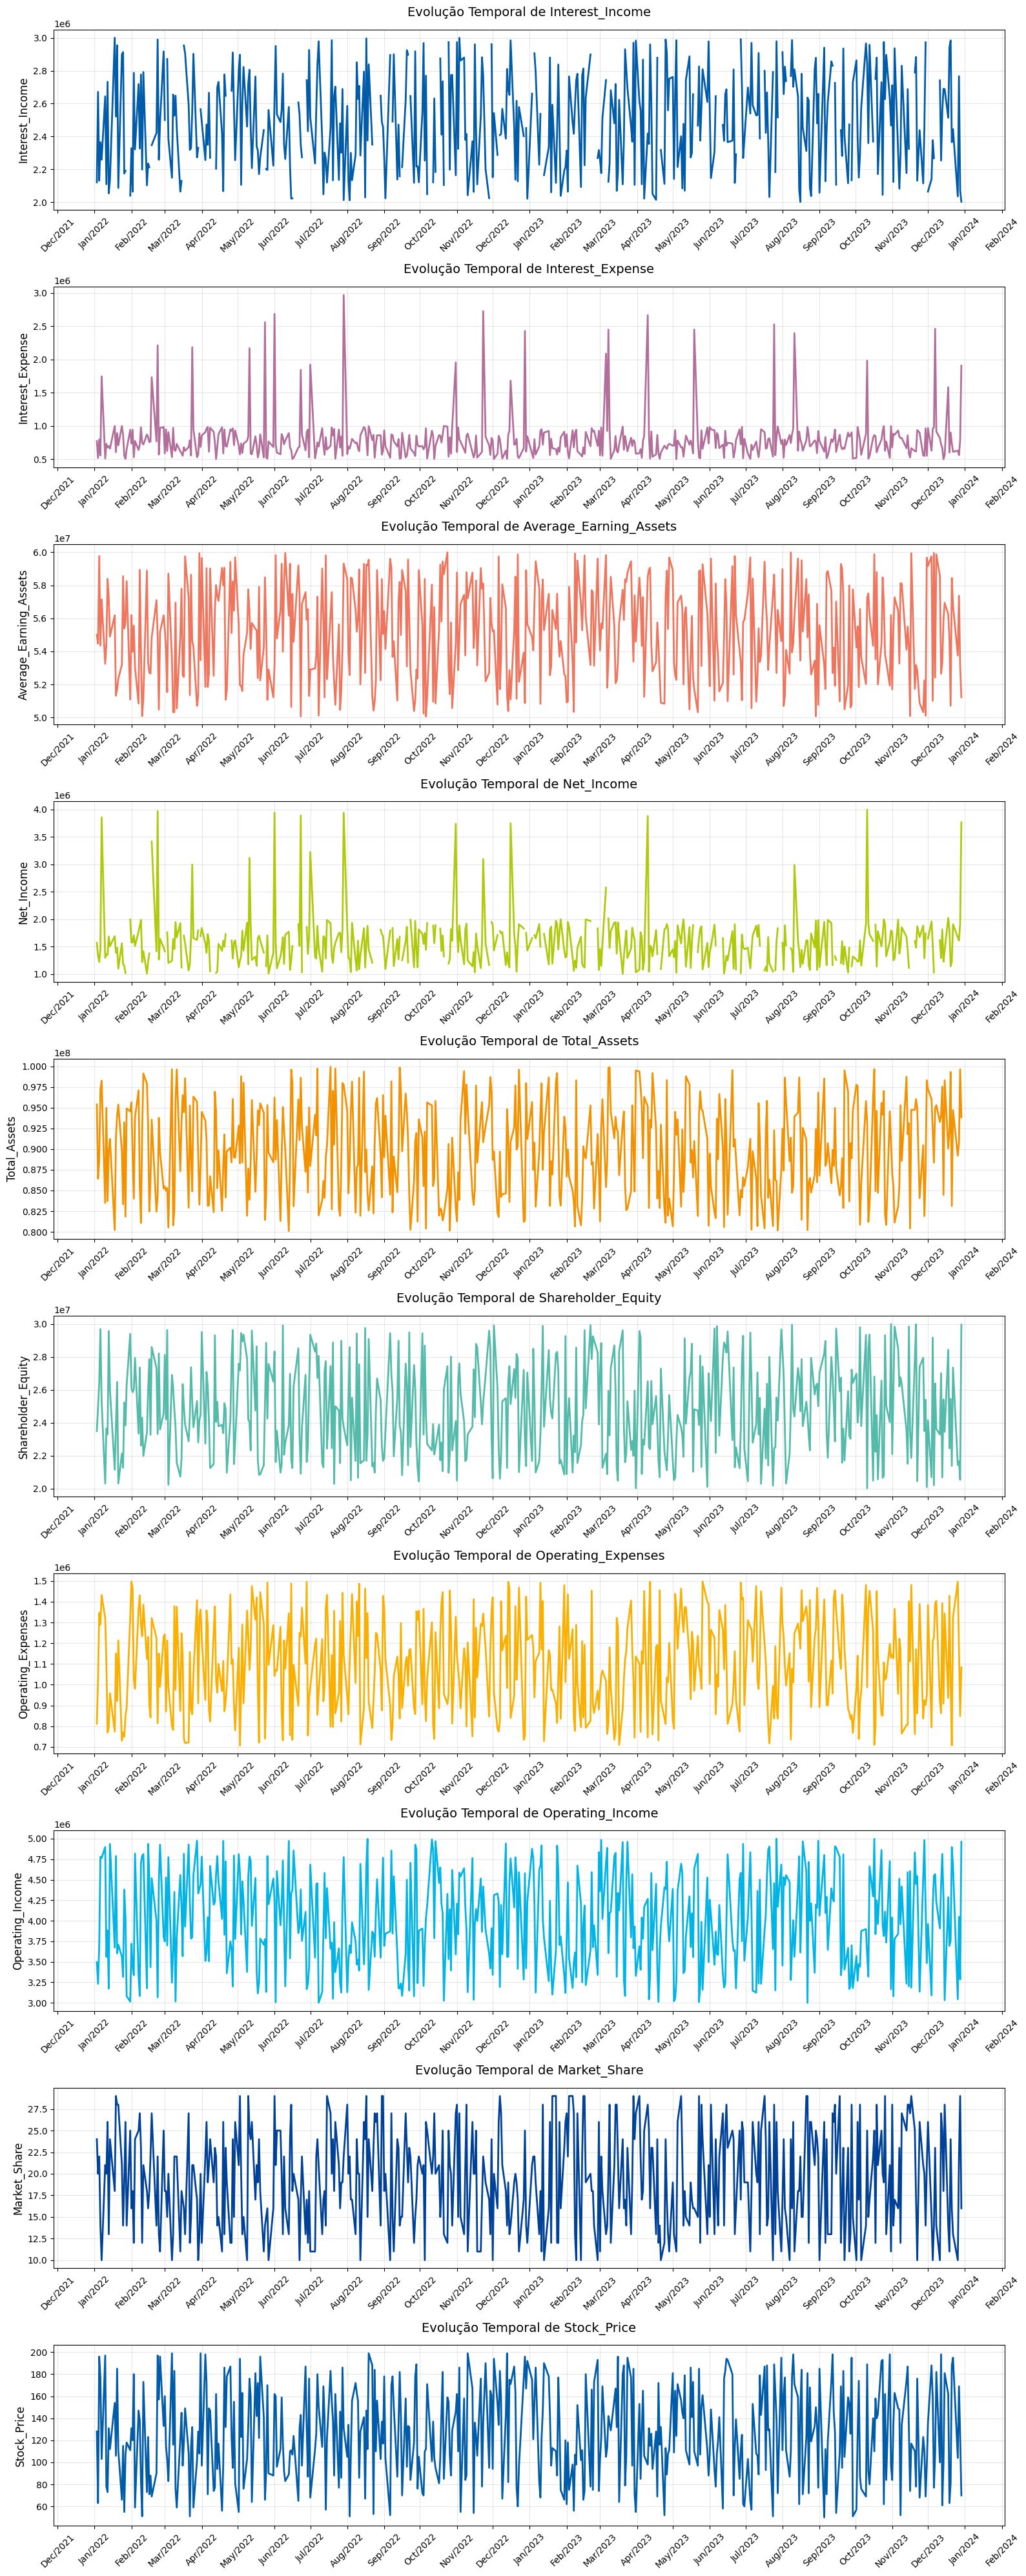

In [11]:
variaveis = df.select_dtypes(include=['number']).columns.tolist()

fig, axes = plt.subplots(len(variaveis), 1, figsize=(16, 4*len(variaveis)), sharex=False)

if len(variaveis) == 1:
    axes = [axes]

for i, var in enumerate(variaveis):
    axes[i].plot(df.index, df[var], color=paleta[i % len(paleta)], linewidth=2)
    axes[i].set_title(f'Evolução Temporal de {var}', fontsize=14, pad=15)
    axes[i].set_ylabel(var, fontsize=12)
    axes[i].grid(True, alpha=0.3)
    axes[i].xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # A cada 2 meses
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))  # Formato "Out/2023"
    plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45)


plt.tight_layout()
plt.show()

### Dados Duplicados

In [12]:
df.isnull().sum()

Interest_Income           49
Interest_Expense           0
Average_Earning_Assets     0
Net_Income                49
Total_Assets               0
Shareholder_Equity         0
Operating_Expenses         0
Operating_Income           0
Market_Share               0
Stock_Price                0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df['Interest_Income'] = df['Interest_Income'].interpolate(method='time')
df['Net_Income'] = df['Net_Income'].interpolate(method='time')

# Preencher eventuais valores restantes nas extremidades
df = df.fillna(method='ffill').fillna(method='bfill')

# Verificar se ainda há missing values
print("Missing values após tratamento:")
print(df.isnull().sum())

Missing values após tratamento:
Interest_Income           0
Interest_Expense          0
Average_Earning_Assets    0
Net_Income                0
Total_Assets              0
Shareholder_Equity        0
Operating_Expenses        0
Operating_Income          0
Market_Share              0
Stock_Price               0
dtype: int64


C:\Users\01fab\AppData\Local\Temp\ipykernel_17252\1285139062.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


### Tratamento de Outlier

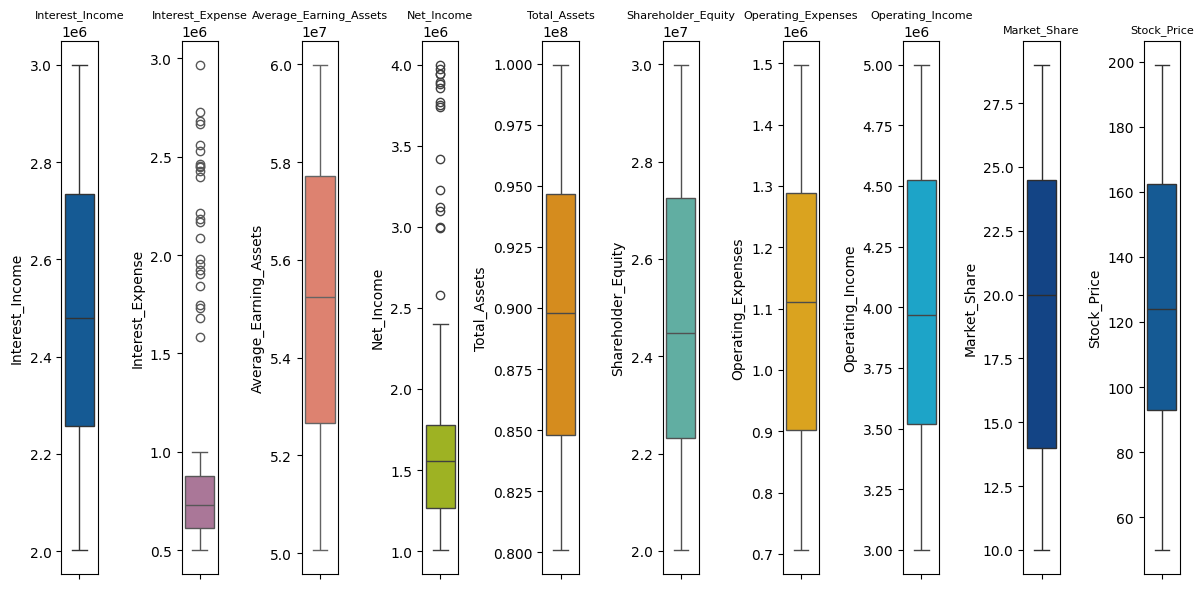

In [15]:
# Criar boxplots para cada variável
fig, axes = plt.subplots(1, len(variaveis), figsize=(12, 6))

if len(variaveis) == 1:
    axes = [axes]

for i, var in enumerate(variaveis):
    sns.boxplot(y=df[var], ax=axes[i], color=paleta[i % len(paleta)])
    axes[i].set_title(f'{var}', fontsize=8)
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

In [16]:
Q1 = df['Net_Income'].quantile(0.25)
Q3 = df['Net_Income'].quantile(0.75)
IQR = Q3 - Q1

Limite_inferior = Q1 - 1.5 * IQR
Limite_superior = Q3 + 1.5 * IQR

df_sem_outliers = df[(df['Net_Income'] >= Limite_inferior) & (df['Net_Income'] <= Limite_superior)]

Q1 = df['Interest_Expense'].quantile(0.25)
Q3 = df['Interest_Expense'].quantile(0.75)
IQR = Q3 - Q1

Limite_inferior = Q1 - 1.5 * IQR
Limite_superior = Q3 + 1.5 * IQR

df_sem_outliers = df[(df['Interest_Expense'] >= Limite_inferior) & (df['Interest_Expense'] <= Limite_superior)]

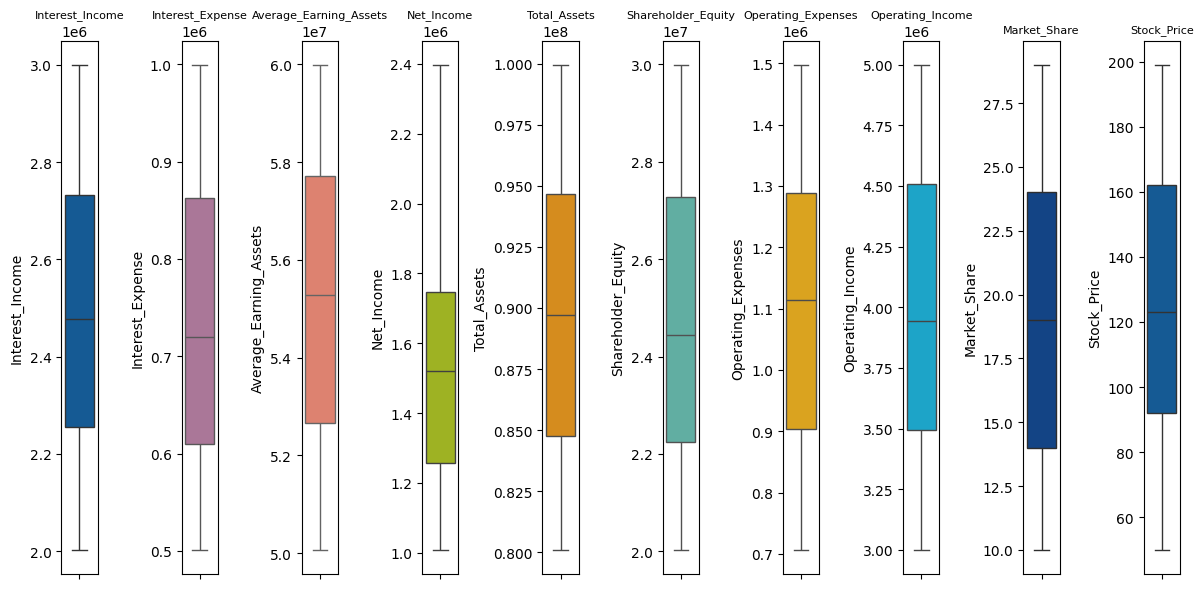

In [17]:
# Criar boxplots para cada variável
variaveis = df_sem_outliers.select_dtypes(include=['number']).columns.tolist()
fig, axes = plt.subplots(1, len(variaveis), figsize=(12, 6))

if len(variaveis) == 1:
    axes = [axes]

for i, var in enumerate(variaveis):
    sns.boxplot(y=df_sem_outliers[var], ax=axes[i], color=paleta[i % len(paleta)])
    axes[i].set_title(f'{var}', fontsize=8)
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

In [18]:
df.describe().round(2)

,Interest_Income,Interest_Expense,Average_Earning_Assets,Net_Income,Total_Assets,Shareholder_Equity,Operating_Expenses,Operating_Income,Market_Share,Stock_Price
count,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00
mean,2492617.95,806042.37,55155656.85,1582643.96,89851313.21,24812199.35,1099387.20,3997437.18,19.47,126.41
std,284518.32,358863.85,2918602.43,472885.30,5621291.33,2859953.37,226738.15,582429.10,5.76,42.20
min,2002869.00,501015.00,50064323.00,1007906.00,80100734.00,20019675.00,706530.00,3000159.00,10.00,50.00
25%,2257133.00,613848.50,52659005.50,1265412.82,84809558.50,22321503.50,902425.50,3518869.50,14.00,93.00
50%,2480047.00,730229.00,55238331.00,1557732.50,89799314.00,24476321.00,1110925.00,3969831.00,20.00,124.00
75%,2733948.00,875773.00,57715991.00,1780637.50,94674812.00,27262167.50,1288376.50,4523654.00,24.50,162.50
max,2999890.00,2967591.00,59993726.00,3999402.00,99951324.00,29992154.00,1497622.00,4999284.00,29.00,199.00


In [19]:
df_sem_outliers.describe().round(2)

,Interest_Income,Interest_Expense,Average_Earning_Assets,Net_Income,Total_Assets,Shareholder_Equity,Operating_Expenses,Operating_Income,Market_Share,Stock_Price
count,475.00,475.00,475.00,475.00,475.00,475.00,475.00,475.00,475.00,475.00
mean,2492164.09,734520.99,55159990.26,1512590.01,89795625.50,24797536.15,1102425.94,3983026.47,19.45,125.98
std,284886.44,147463.73,2919209.83,289319.44,5617536.16,2875527.45,226854.77,582438.29,5.74,42.17
min,2002869.00,501015.00,50064323.00,1007906.00,80100734.00,20029725.00,706530.00,3000159.00,10.00,50.00
25%,2255293.50,609536.50,52659005.50,1258158.00,84773333.50,22245889.50,903087.00,3495470.00,14.00,92.00
50%,2477095.00,719930.00,55275034.00,1520551.00,89714891.00,24437610.00,1114600.00,3945238.00,19.00,123.00
75%,2732046.00,862369.00,57715991.00,1746412.50,94660124.00,27279528.00,1289258.00,4509374.50,24.00,162.00
max,2999890.00,999616.00,59993726.00,2397744.50,99951324.00,29992154.00,1497622.00,4999284.00,29.00,199.00


### Visualização dos Dados

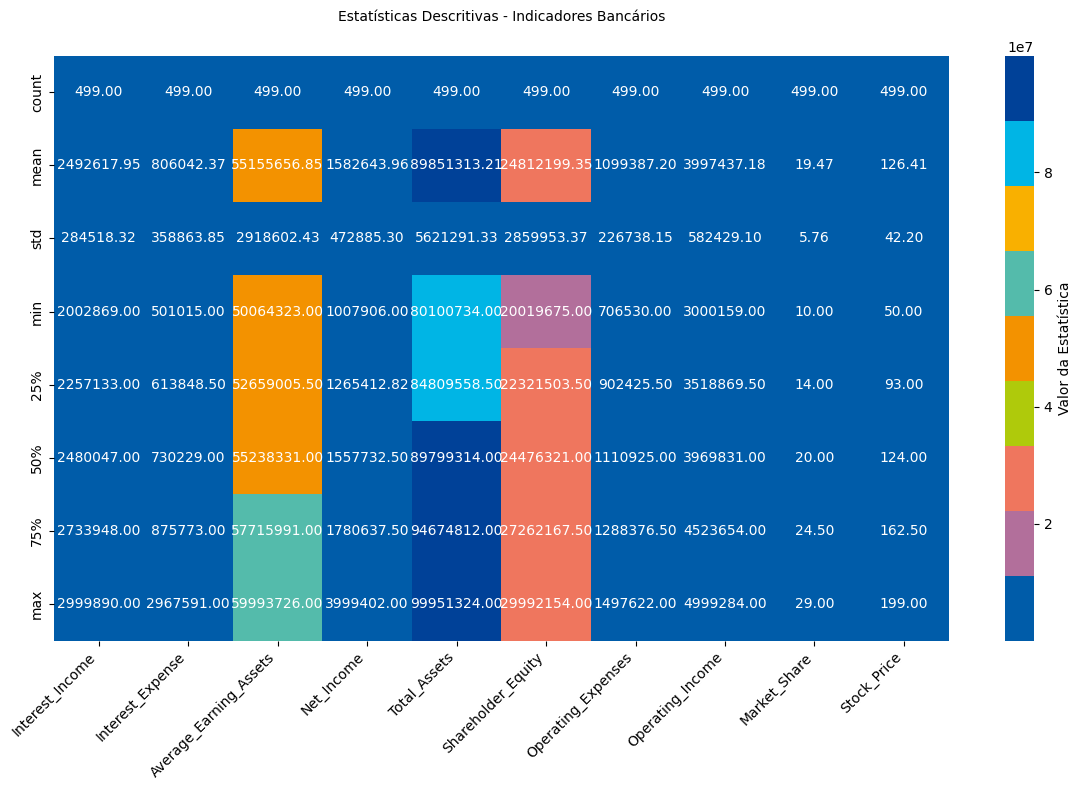

In [20]:
# Gerar estatísticas descritivas
descricao = df.describe().round(2)

# Heatmap das estatísticas
plt.figure(figsize=(12, 8))
sns.heatmap(descricao, 
            annot=True,
            cmap= paleta,
            fmt='.2f',
            cbar_kws={'label': 'Valor da Estatística'})
plt.title('Estatísticas Descritivas - Indicadores Bancários', fontsize=10, pad=25)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


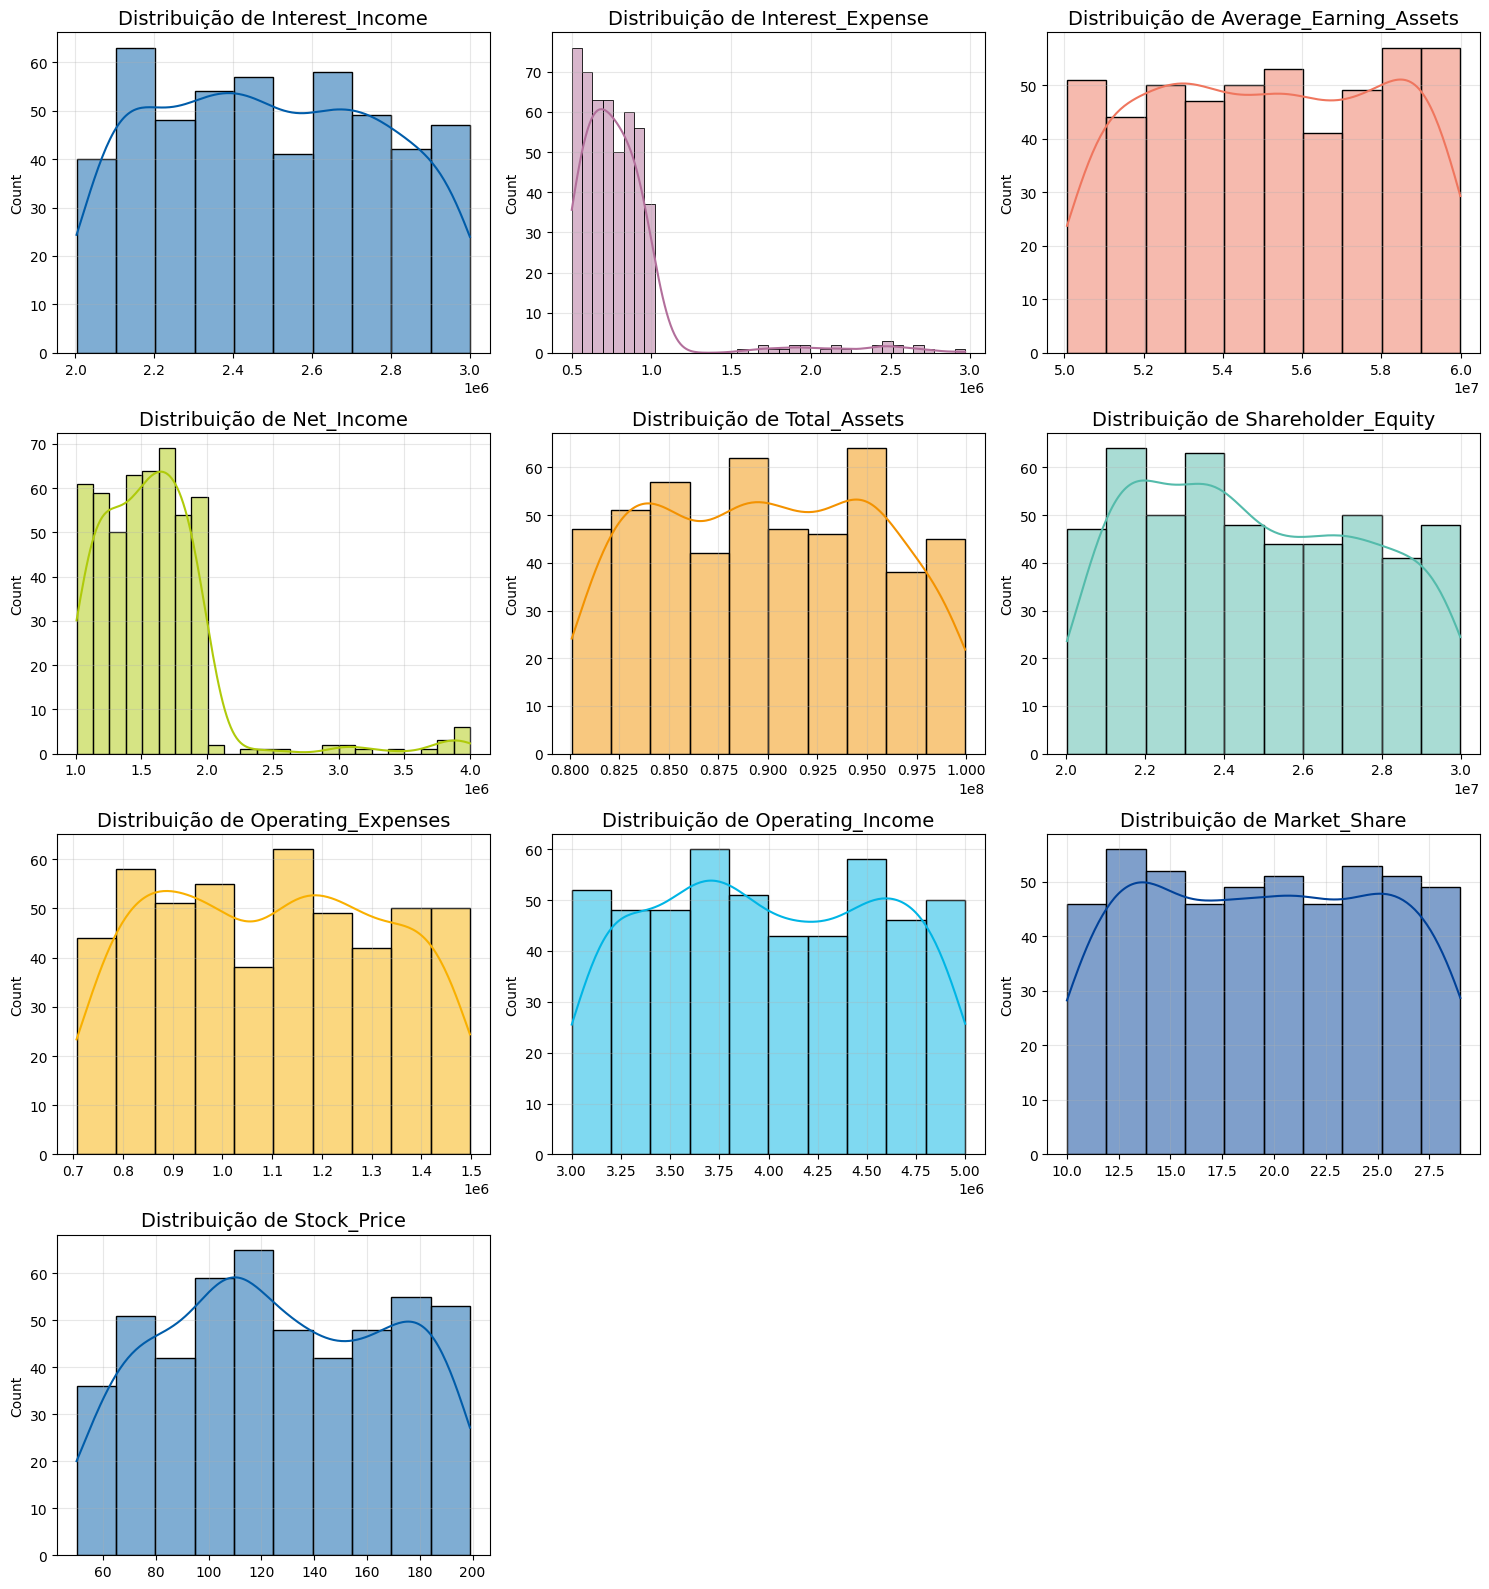

In [21]:
# Lista de variáveis numéricas
variaveis = df.select_dtypes(include=['number']).columns.tolist()

# Criar subplots para distribuições
n_cols = 3
n_rows = (len(variaveis) + n_cols - 1) // n_cols  # Arredondar para cima

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for i, var in enumerate(variaveis):
    sns.histplot(df[var], kde=True, color=paleta[i % len(paleta)], ax=axes[i])
    axes[i].set_title(f'Distribuição de {var}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].grid(True, alpha=0.3)

# Remover eixos vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

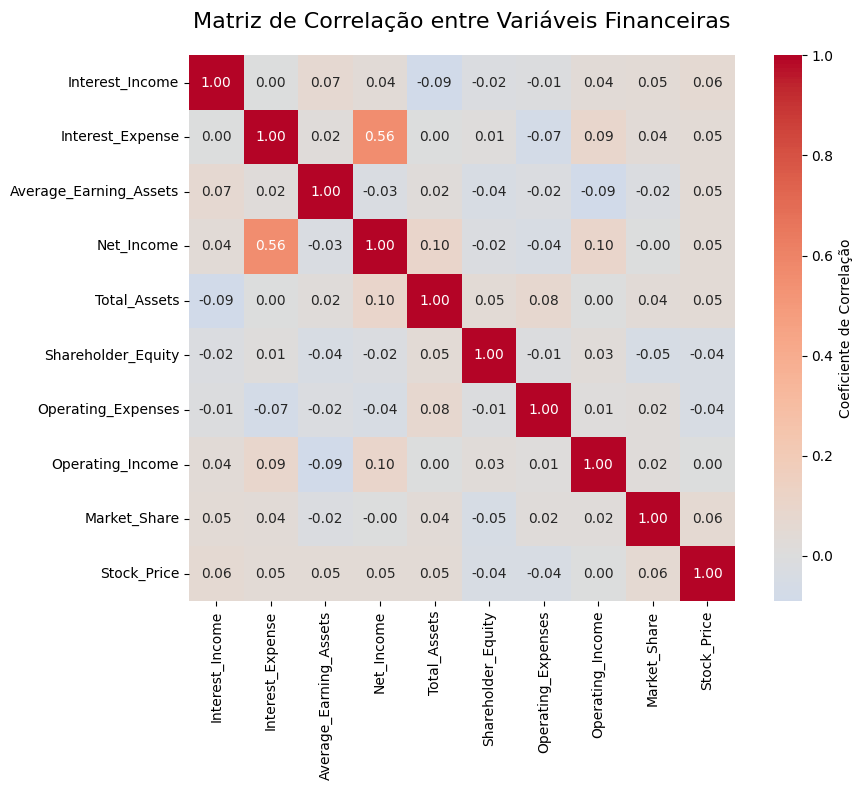

In [22]:
# Calcular matriz de correlação
corr_matrix = df.corr().round(2)

# Heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'label': 'Coeficiente de Correlação'})
plt.title('Matriz de Correlação entre Variáveis Financeiras', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

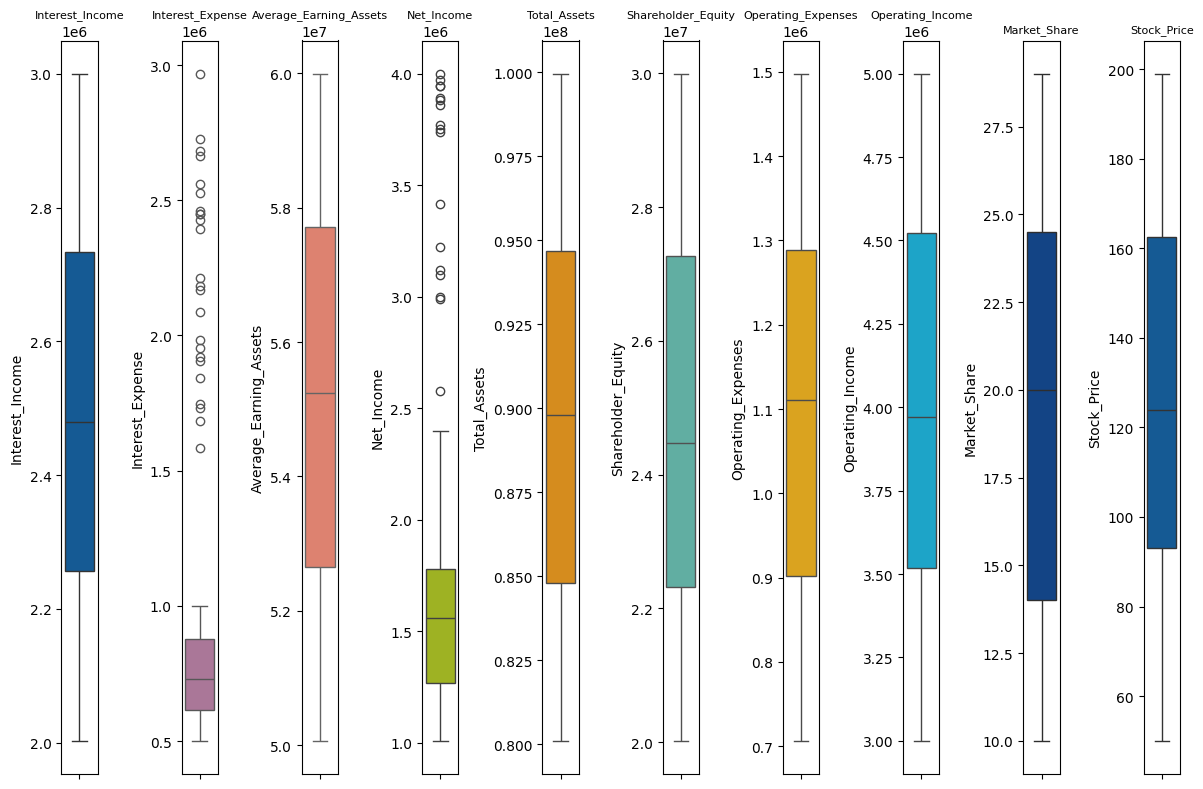

In [35]:
# Criar boxplots para cada variável
fig, axes = plt.subplots(1, len(variaveis), figsize=(12, 8))

if len(variaveis) == 1:
    axes = [axes]

for i, var in enumerate(variaveis):
    sns.boxplot(y=df[var], ax=axes[i], color=paleta[i % len(paleta)])
    axes[i].set_title(f'{var}', fontsize=8)
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

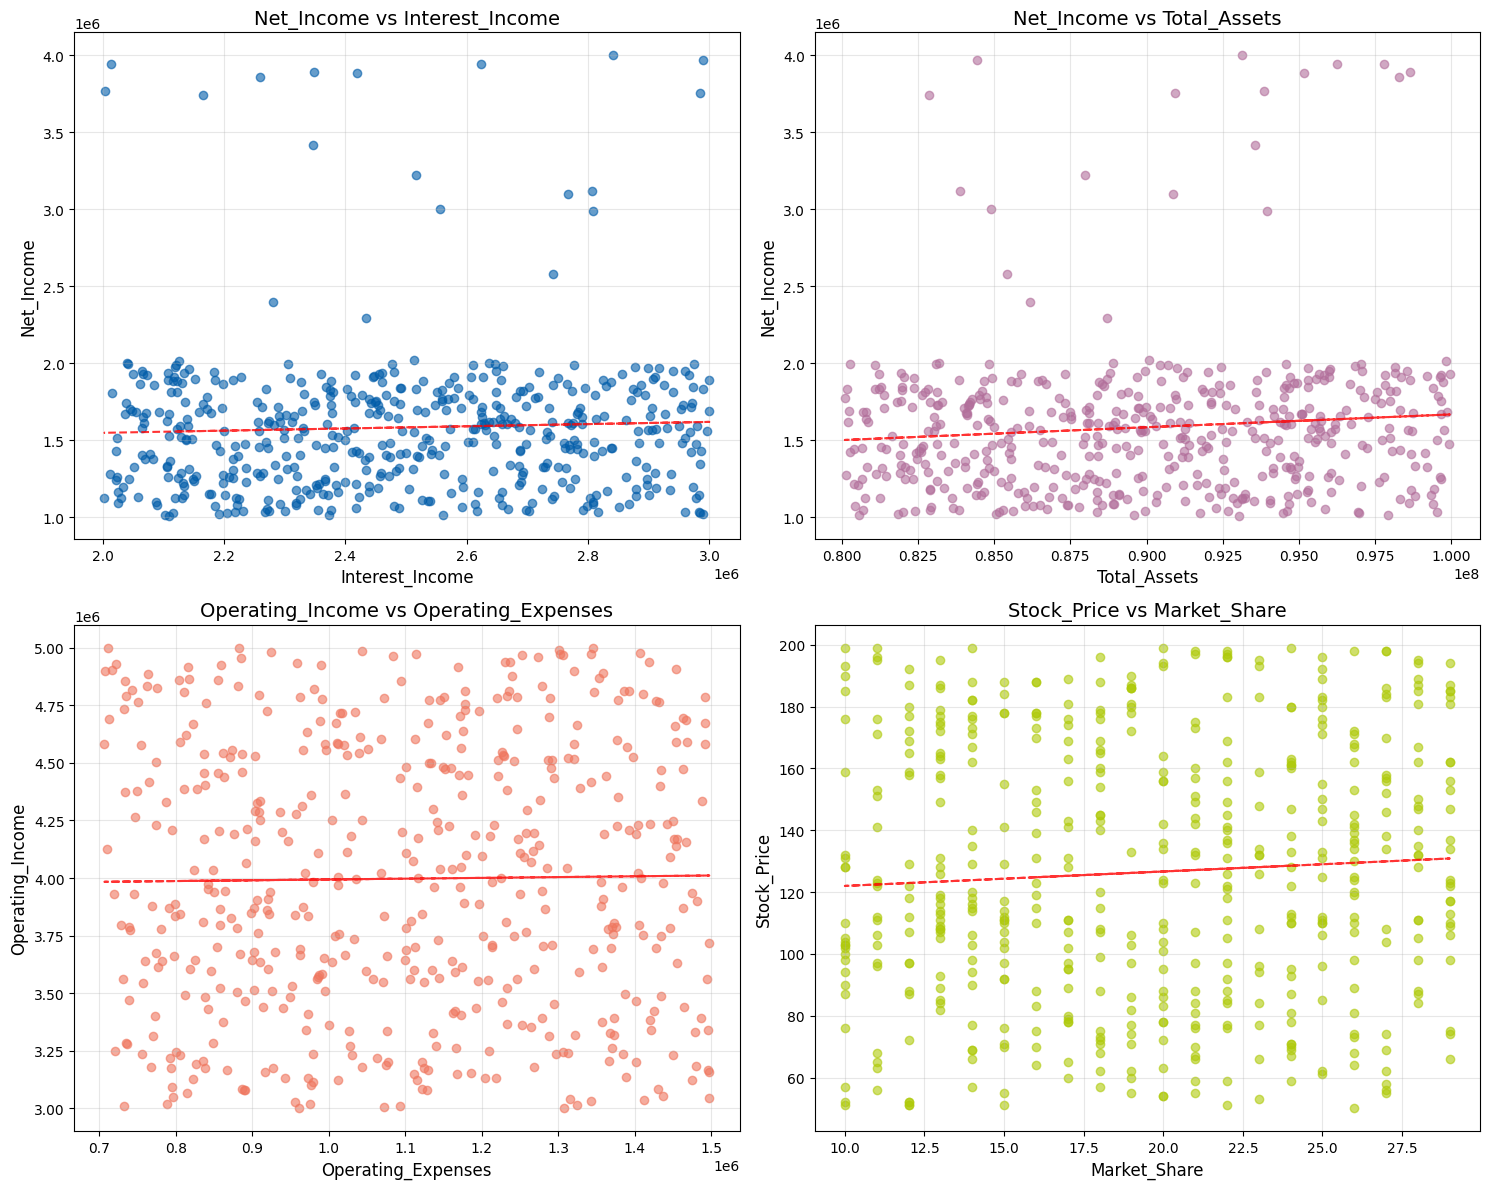

In [24]:
# Selecionar pares de variáveis interessantes
pares_interessantes = [
    ('Interest_Income', 'Net_Income'),
    ('Total_Assets', 'Net_Income'),
    ('Operating_Expenses', 'Operating_Income'),
    ('Market_Share', 'Stock_Price')
]

# Criar subplots para scatter plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, (x_var, y_var) in enumerate(pares_interessantes):
    axes[i].scatter(df[x_var], df[y_var], alpha=0.6, color=paleta[i % len(paleta)])
    axes[i].set_xlabel(x_var, fontsize=12)
    axes[i].set_ylabel(y_var, fontsize=12)
    axes[i].set_title(f'{y_var} vs {x_var}', fontsize=14)
    axes[i].grid(True, alpha=0.3)
    
    # Adicionar linha de tendência
    z = np.polyfit(df[x_var], df[y_var], 1)
    p = np.poly1d(z)
    axes[i].plot(df[x_var], p(df[x_var]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

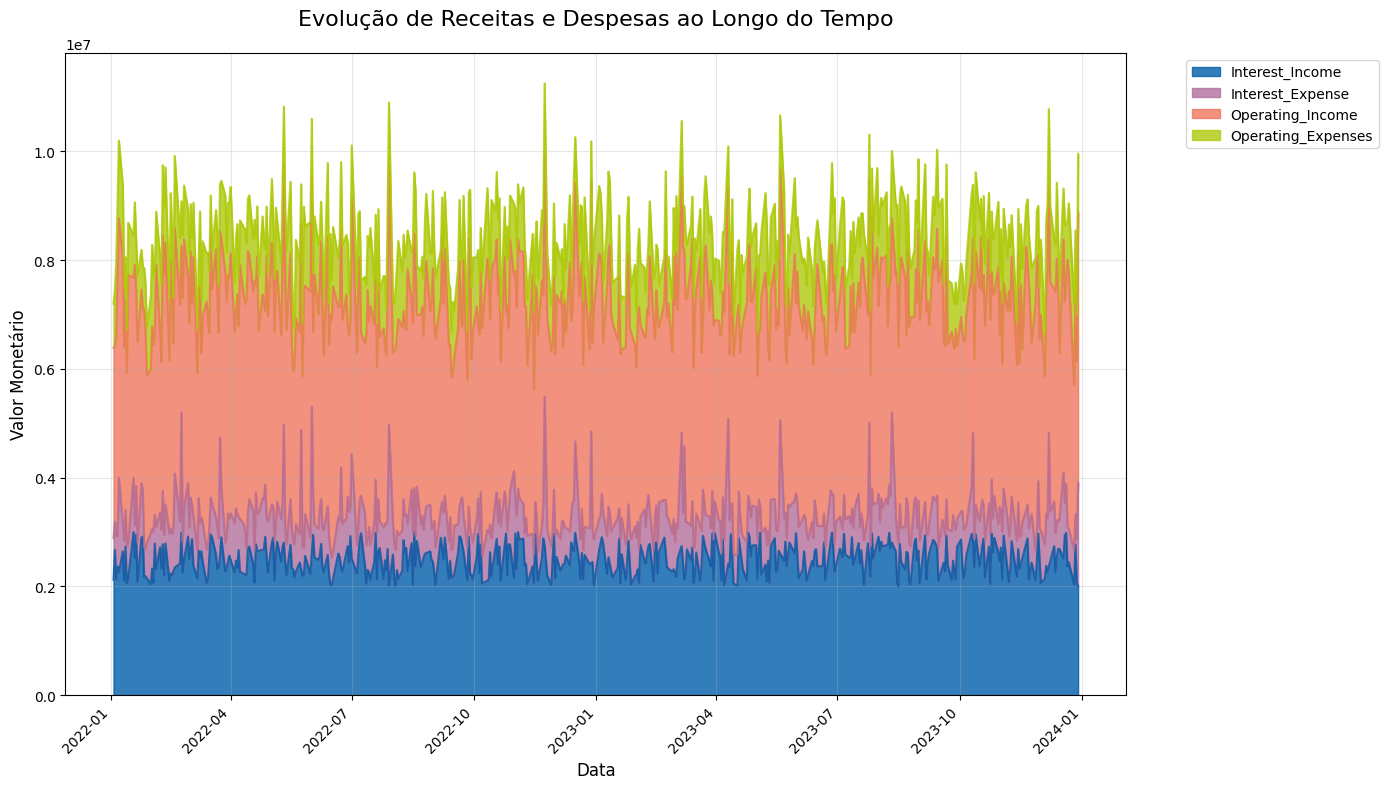

In [25]:
# Criar gráfico de área para receitas e despesas
variaveis_financeiras = ['Interest_Income', 'Interest_Expense', 'Operating_Income', 'Operating_Expenses']

plt.figure(figsize=(14, 8))
df[variaveis_financeiras].plot.area(alpha=0.8, figsize=(14, 8), 
                                   color=[paleta[i] for i in range(len(variaveis_financeiras))])
plt.title('Evolução de Receitas e Despesas ao Longo do Tempo', fontsize=16, pad=20)
plt.ylabel('Valor Monetário', fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

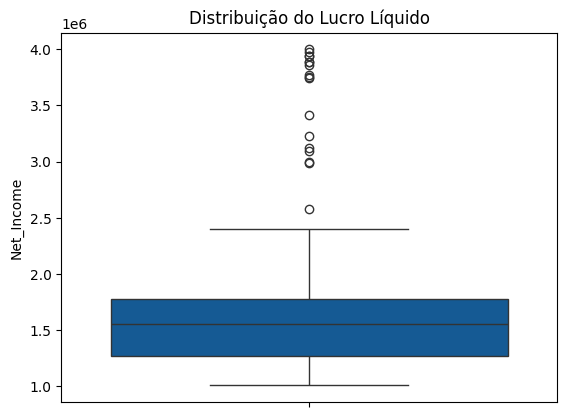

In [26]:
sns.boxplot(data=df, y='Net_Income')
plt.title('Distribuição do Lucro Líquido')
plt.show()

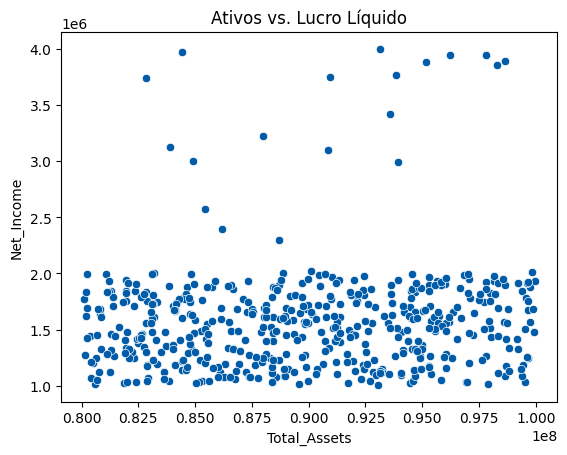

In [27]:
sns.scatterplot(data=df, x='Total_Assets', y='Net_Income',)
plt.title('Ativos vs. Lucro Líquido')
plt.show()

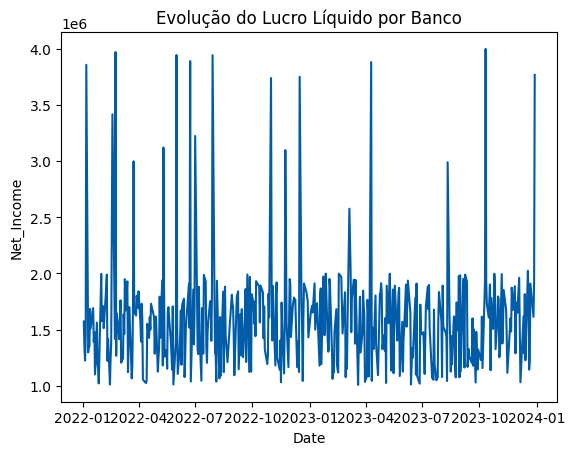

In [28]:
sns.lineplot(data=df, x='Date', y='Net_Income')
plt.title('Evolução do Lucro Líquido por Banco')
plt.show()

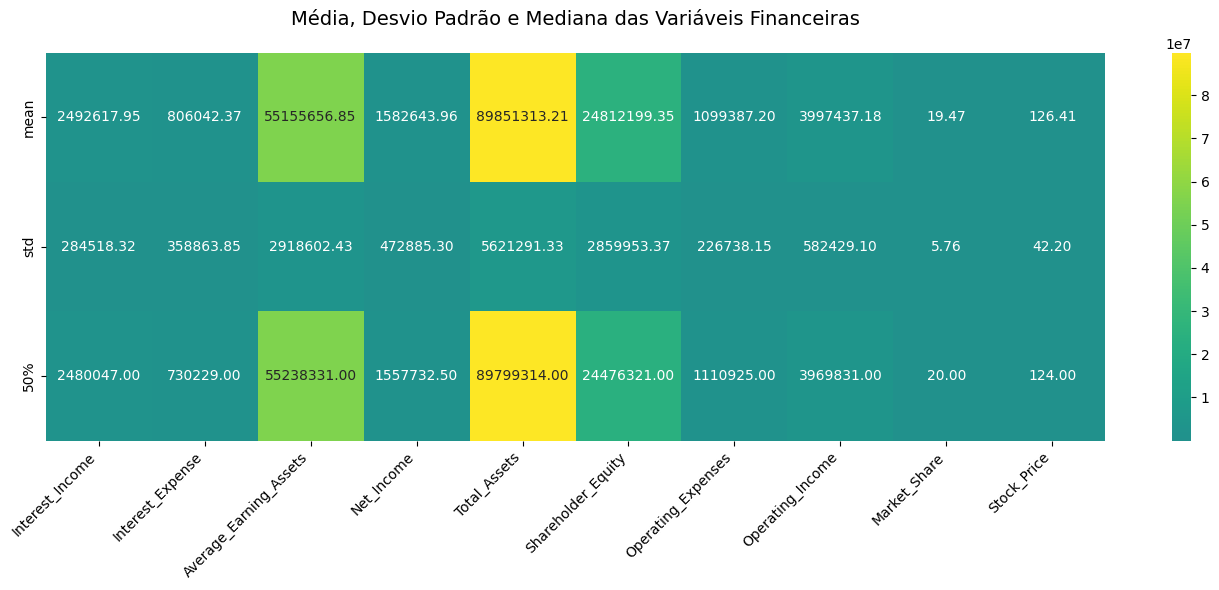

In [31]:
# Selecionar apenas algumas estatísticas para visualizar melhor
estatisticas_selecionadas = descricao.loc[['mean', 'std', '50%']]  # Média, desvio padrão e mediana

plt.figure(figsize=(14, 6))
sns.heatmap(estatisticas_selecionadas, 
            annot=True, 
            cmap='viridis', 
            fmt='.2f',
            center=0)  # Centraliza a cor em 0
plt.title('Média, Desvio Padrão e Mediana das Variáveis Financeiras', 
          fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
#del df